In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,8
import seaborn as sb

In [6]:
train = pd.read_csv('F:/Data_Science/Datasets/houseprices_train.csv')
test = pd.read_csv('F:/Data_Science/Datasets/houseprices_test.csv')
print(train.shape, test.shape)

(1460, 82) (1459, 80)


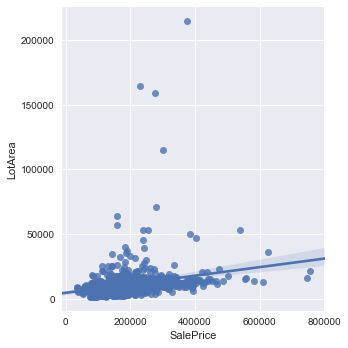

In [3]:
sb.lmplot('SalePrice', 'LotArea', data=train)

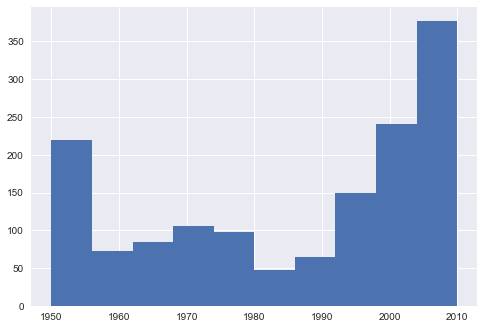

In [37]:
train['YearRemodAdd'].hist()

{'boxes': [<matplotlib.lines.Line2D at 0x1f0f7aab5c0>],
 'caps': [<matplotlib.lines.Line2D at 0x1f0f7ab5fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f0f7ac49b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1f0f7abbac8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1f0f7aabf60>,
  <matplotlib.lines.Line2D at 0x1f0f7ab57f0>]}

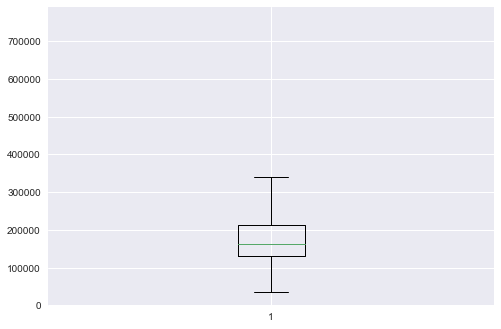

In [52]:
plt.boxplot(train.SalePrice)

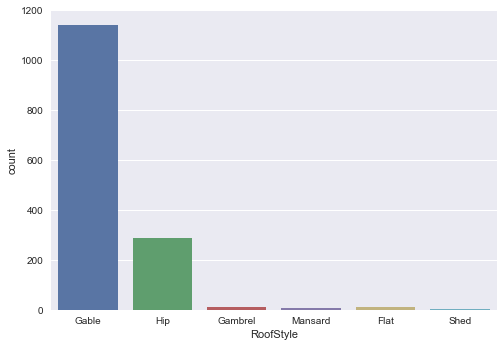

In [41]:
sb.countplot(x='RoofStyle', data=train)

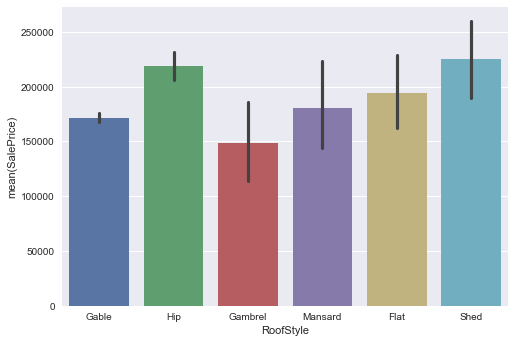

In [44]:
sb.barplot(x='RoofStyle', y ='SalePrice', data=train)

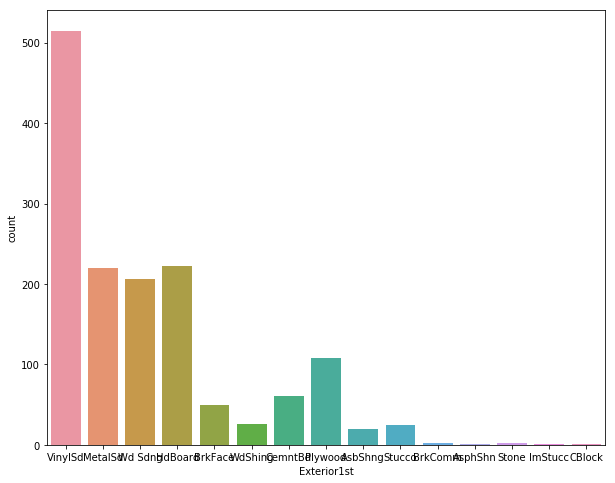

In [4]:
#train['MasVnrType'].value_counts().plot(kind='bar')
#or
sb.countplot(x='Exterior1st', data=train)

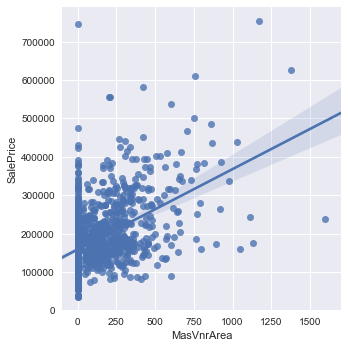

In [51]:
#train['MasVnrArea'].hist()
sb.lmplot(x='MasVnrArea',y='SalePrice',data=train)

In [55]:
train['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [57]:
train['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [58]:
train['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

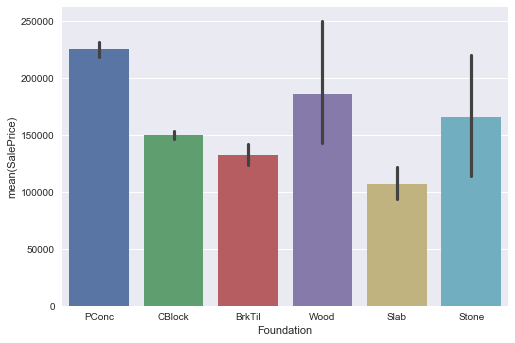

In [59]:
sb.barplot(x='Foundation',y='SalePrice',data=train)

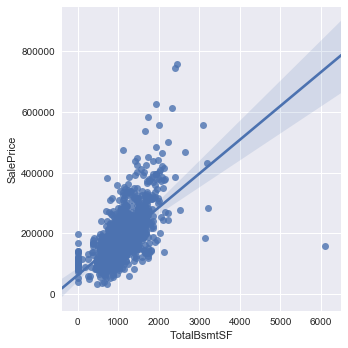

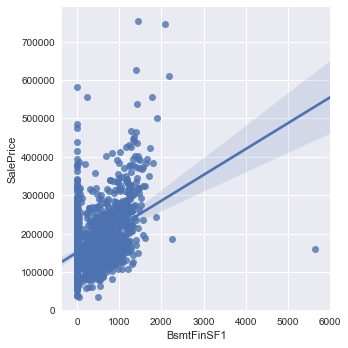

In [66]:
sb.lmplot(x = 'TotalBsmtSF', y = 'SalePrice', data=train)
sb.lmplot(x = 'BsmtFinSF1', y = 'SalePrice', data=train)
#'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'

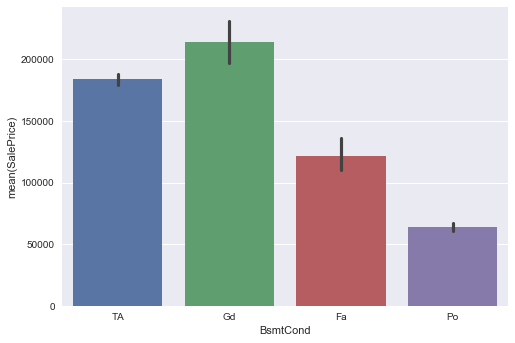

In [68]:
sb.barplot(x='BsmtCond', y='SalePrice',data=train)

In [70]:
bsmt = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
train[bsmt].describe()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
count,1423,1423,1422,1423,1422
unique,4,4,4,6,6
top,TA,TA,No,Unf,Unf
freq,649,1311,953,430,1256


In [72]:
train['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

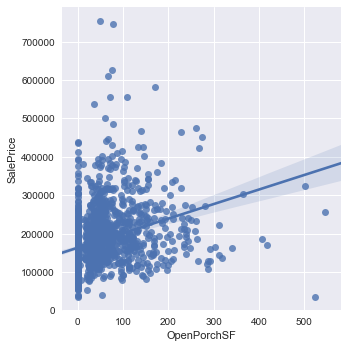

In [104]:
sb.lmplot(x='OpenPorchSF', y='SalePrice', data=train)

In [121]:
train['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [119]:
rows = train['SaleType'] == 0
rows.sum()

0

In [118]:
train['SaleType'].isnull().sum()

0

In [7]:
train['source'] = 'train'
test['source'] = 'test'
print(train.shape, test.shape)

(1460, 83) (1459, 81)


In [8]:
df = pd.concat([train, test])
df.shape

(2919, 83)

In [9]:
del_col = ['LotFrontage','LandContour','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st'
           ,'Exterior2nd','MasVnrType','MasVnrArea','ExterCond','Foundation','BsmtCond','BsmtExposure','BsmtFinType1'
           ,'BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','Heating','CentralAir','Electrical','LowQualFinSF'
           ,'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','KitchenAbvGr','Functional','GarageType','GarageYrBlt'
           ,'GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF'
           ,'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature','MiscVal','SaleType'
           ,'SaleCondition']
df.drop(del_col, axis=1, inplace=True)
df.shape

(2919, 34)

In [10]:
df.drop('Alley', axis=1,inplace=True)
df.shape

(2919, 33)

In [11]:
df.drop(['1stFlrSF','2ndFlrSF','Fireplaces','FireplaceQu'], axis=1, inplace=True)
df.shape

(2919, 29)

In [12]:
df.describe()

,BedroomAbvGr,BldgAge,GrLivArea,Id,LotArea,MSSubClass,MoSold,OverallCond,OverallQual,SalePrice,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,1460.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000
mean,2.860226,33.134247,1500.759849,1460.000000,10168.114080,57.137718,6.213087,5.564577,6.089072,180921.195890,6.451524,1051.777587,1971.312778,1984.264474,2007.792737
std,0.822693,20.645407,506.051045,842.787043,7886.996359,42.517628,2.714762,1.113131,1.409947,79442.502883,1.569379,440.766258,30.291442,20.894344,1.314964
min,0.000000,8.000000,334.000000,1.000000,1300.000000,20.000000,1.000000,1.000000,1.000000,34900.000000,2.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,2.000000,14.000000,1126.000000,730.500000,7478.000000,20.000000,4.000000,5.000000,5.000000,129975.000000,5.000000,793.000000,1953.500000,1965.000000,2007.000000
50%,3.000000,24.000000,1444.000000,1460.000000,9453.000000,50.000000,6.000000,5.000000,6.000000,163000.000000,6.000000,989.500000,1973.000000,1993.000000,2008.000000
75%,3.000000,51.000000,1743.500000,2189.500000,11570.000000,70.000000,8.000000,6.000000,7.000000,214000.000000,7.000000,1302.000000,2001.000000,2004.000000,2009.000000
max,8.000000,68.000000,5642.000000,2919.000000,215245.000000,190.000000,12.000000,9.000000,10.000000,755000.000000,15.000000,6110.000000,2010.000000,2010.000000,2010.000000


In [13]:
df.isnull().sum()

BedroomAbvGr       0
BldgAge         1459
BsmtQual          81
Condition1         0
Condition2         0
ExterQual          0
GrLivArea          0
HeatingQC          0
Id                 0
KitchenQual        1
LandSlope          0
LotArea            0
LotConfig          0
LotShape           0
MSSubClass         0
MSZoning           4
MoSold             0
Neighborhood       0
OverallCond        0
OverallQual        0
SalePrice       1459
Street             0
TotRmsAbvGrd       0
TotalBsmtSF        1
Utilities          2
YearBuilt          0
YearRemodAdd       0
YrSold             0
source             0
dtype: int64

In [14]:
#All null values of BsmtQual is no Basement
rows = df['BsmtQual'].isnull()
print ('Before: ', df['BsmtQual'].isnull().sum())
df.loc[rows,'BsmtQual'] = 'None'
print ('After: ', df['BsmtQual'].isnull().sum())

Before:  81
After:  0


In [15]:
#TotalBsmtSF = 0 values
zero = (df['BsmtQual'] == 'None')
print ('Before:', df['TotalBsmtSF'].isnull().sum())
df.loc[zero, 'TotalBsmtSF'] = 0
print ('After:', df['TotalBsmtSF'].isnull().sum())

Before: 1
After: 0


In [16]:
#Filling missing values for KitchenQual, MSZoning, Utilities
df['KitchenQual'].fillna(df['KitchenQual'].mode()[0], inplace= True)

df['MSZoning'].fillna(df['MSZoning'].mode()[0], inplace= True)

df['Utilities'].fillna(df['Utilities'].mode()[0], inplace= True)

In [17]:
df.drop('BldgAge', axis=1,inplace=True)
df.shape

(2919, 28)

In [20]:
df['YearRemodAdd'].value_counts()

1950    361
2006    202
2007    164
2005    141
2004    111
2000    104
2003     99
2002     82
2008     81
1998     77
1999     60
1996     59
1995     56
1994     53
1997     49
2001     49
1976     48
1977     46
1970     44
1993     43
1968     39
1978     36
1972     35
1958     34
2009     34
1967     34
1992     32
1971     31
1959     30
1963     30
       ... 
1956     30
1990     29
1960     29
1991     29
1954     28
1965     28
1966     27
1962     26
1980     26
1964     26
1969     26
1955     25
1979     24
1961     24
1973     21
1957     20
1953     20
1984     19
1974     19
1989     18
1987     16
1988     15
1952     15
1985     14
1951     14
2010     13
1981     12
1986     12
1983     11
1982      9
Name: YearRemodAdd, Length: 61, dtype: int64

In [15]:
cat = df.dtypes[df.dtypes == 'object'].index
df[cat].describe()

,BsmtQual,Condition1,Condition2,ExterQual,HeatingQC,KitchenQual,LandSlope,LotConfig,LotShape,MSZoning,Neighborhood,Street,Utilities,source
count,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919
unique,5,9,8,4,5,4,3,5,4,5,25,2,2,2
top,TA,Norm,Norm,TA,Ex,TA,Gtl,Inside,Reg,RL,NAmes,Pave,AllPub,train
freq,1283,2511,2889,1798,1493,1493,2778,2133,1859,2269,443,2907,2918,1460


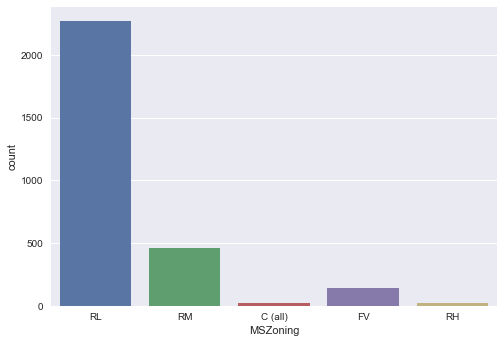

In [153]:
sb.countplot(x='MSZoning', data=df)

In [16]:
#Removing few categorical variable because most of them have 90% same value
df.drop(['Condition1', 'Condition2', 'LandSlope', 'Street', 'Utilities'], axis=1, inplace=True)
df.shape

(2919, 22)

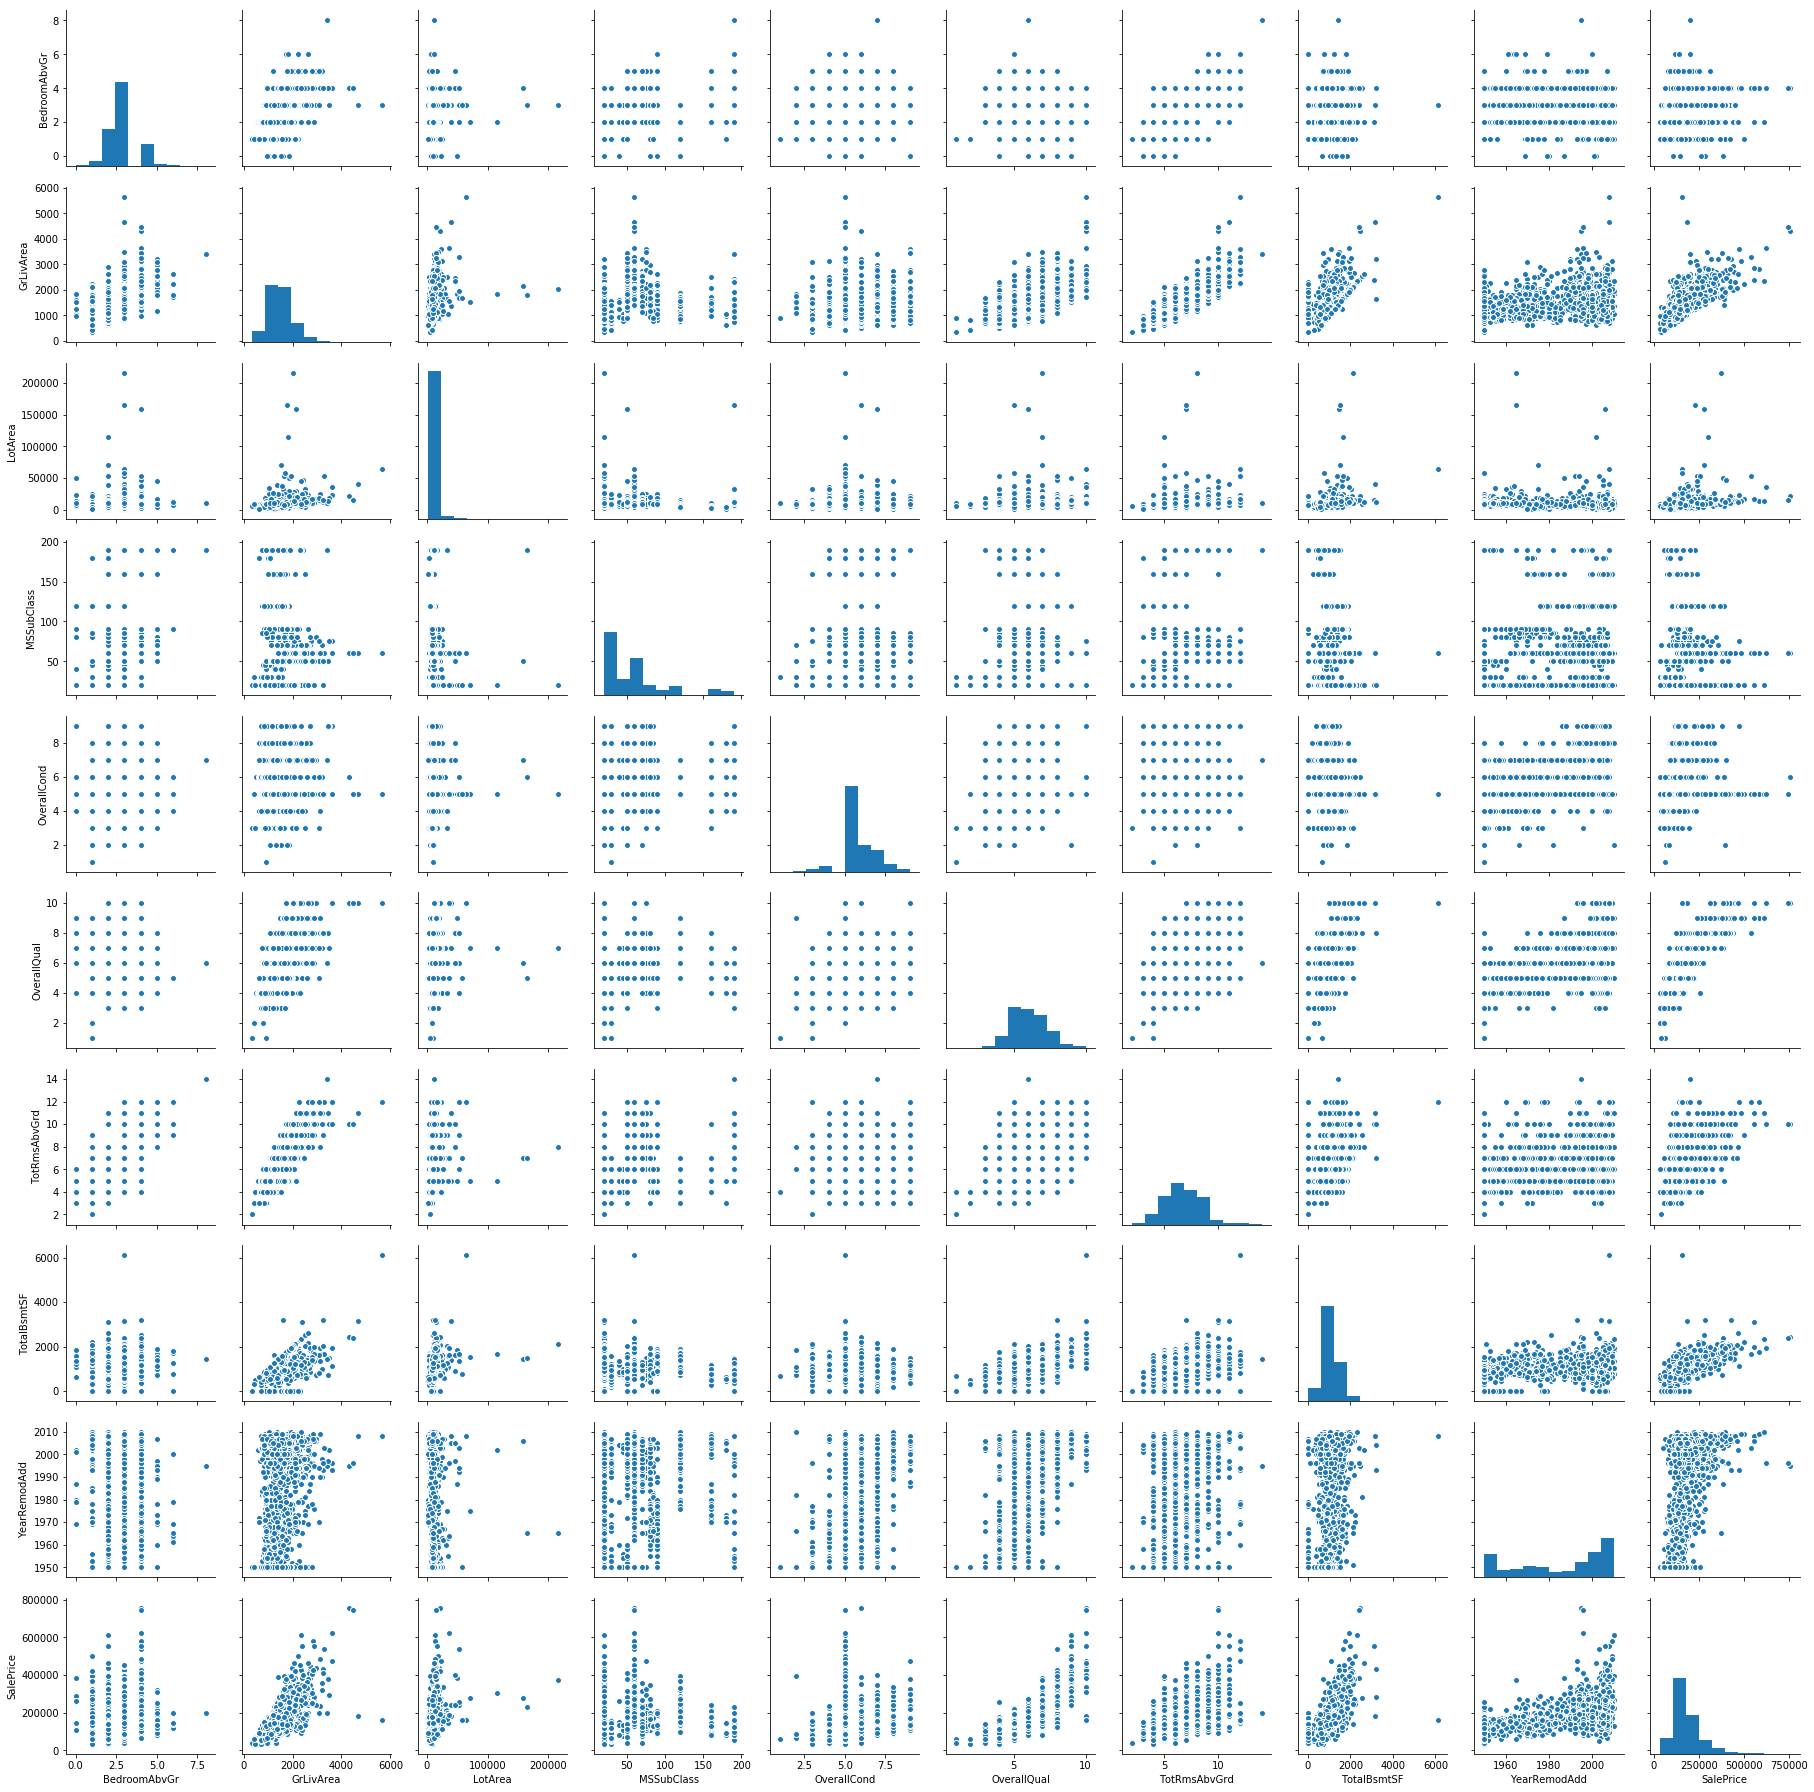

In [26]:
rcParams['figure.figsize'] = 16,10
rows = (df['source'] == 'train')
cat = df.dtypes[df.dtypes != 'object'].index
cat
sb.pairplot(data=df.loc[rows,['BedroomAbvGr','GrLivArea','LotArea','MSSubClass','OverallCond','OverallQual',
                             'TotRmsAbvGrd','TotalBsmtSF','YearRemodAdd','SalePrice']])

In [28]:
df[cat].head()

KeyError: "[dtype('int64') dtype('int64') dtype('int64') dtype('int64') dtype('int64')\n dtype('int64') dtype('int64') dtype('int64') dtype('float64')\n dtype('int64') dtype('float64') dtype('int64') dtype('int64')] not in index"

In [30]:
cat = df.dtypes[df.dtypes != 'object'].index
df[cat].describe()

,BedroomAbvGr,GrLivArea,Id,LotArea,MSSubClass,MoSold,OverallCond,OverallQual,SalePrice,TotRmsAbvGrd,TotalBsmtSF,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,2.860226,1500.759849,1460.000000,10168.114080,57.137718,6.213087,5.564577,6.089072,180921.195890,6.451524,1051.236040,1984.264474,2007.792737
std,0.822693,506.051045,842.787043,7886.996359,42.517628,2.714762,1.113131,1.409947,79442.502883,1.569379,441.491553,20.894344,1.314964
min,0.000000,334.000000,1.000000,1300.000000,20.000000,1.000000,1.000000,1.000000,34900.000000,2.000000,0.000000,1950.000000,2006.000000
25%,2.000000,1126.000000,730.500000,7478.000000,20.000000,4.000000,5.000000,5.000000,129975.000000,5.000000,793.000000,1965.000000,2007.000000
50%,3.000000,1444.000000,1460.000000,9453.000000,50.000000,6.000000,5.000000,6.000000,163000.000000,6.000000,989.000000,1993.000000,2008.000000
75%,3.000000,1743.500000,2189.500000,11570.000000,70.000000,8.000000,6.000000,7.000000,214000.000000,7.000000,1302.000000,2004.000000,2009.000000
max,8.000000,5642.000000,2919.000000,215245.000000,190.000000,12.000000,9.000000,10.000000,755000.000000,15.000000,6110.000000,2010.000000,2010.000000


In [35]:
df['MoSold'].value_counts()

6     503
7     446
5     394
4     279
8     233
3     232
10    173
9     158
11    142
2     133
1     122
12    104
Name: MoSold, dtype: int64

In [36]:
#Create new variable joining month and year sold and drop the exisiting ones.
df['MoYrSold'] = df.MoSold.astype(str).str.cat(df.YrSold.astype(str), sep = '-')
df.shape

(2919, 23)

In [37]:
df.drop(['MoSold','YrSold'], axis=1, inplace=True)
df.shape

(2919, 21)

In [23]:
#Finding if year built is greater than building remodelled year
rows = df['YearRemodAdd'] < df['YearBuilt']
df.loc[rows,['Id','YearBuilt','YearRemodAdd']]

,Id,YearBuilt,YearRemodAdd
416,1877,2002,2001


In [26]:
#Since there is one row and the values are very near, we will change YearRemodAdd to same as YearBuilt
df.loc[rows, 'YearRemodAdd'] = 2002
df.loc[rows,['Id','YearBuilt','YearRemodAdd']]

,Id,YearBuilt,YearRemodAdd
416,1877,2002,2002


In [44]:
#Find if YrSold is less than YearBuilt or YearRemodAdd
#loc1 = df['YrSold'] < df['YearBuilt']
#loc2 = df['YrSold'] < df['YearRemodAdd']
#df.loc[loc1,'YearBuilt'] = df.loc[loc1, 'YrSold']
df.loc[loc2, 'YearRemodAdd'] = df.loc[loc2, 'YrSold']

In [45]:
#Change the values of YearBuilt and YearRemodAdd to same as YrSold since they are close
df.loc[loc2,['Id','YearBuilt','YearRemodAdd', 'YrSold']]

,Id,YearBuilt,YearRemodAdd,YrSold
523,524,2007,2007,2007
835,2296,2007,2007,2007
1089,2550,2007,2007,2007


In [46]:
# We will add 2 columns representing the age of building (YrSold - YearBuilt ) and Remodelled Years (YrSold - YearRemodAdd)
df['BldgAge'] = df['YrSold'] - df['YearBuilt']
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
#df['BldgAge','RemodAge'].describe()

In [49]:
#Drop YearBuilt and YearRemodAdd
print('Before', df.shape)
df.drop(['YearBuilt','YearRemodAdd'], axis=1, inplace=True)
print('After', df.shape)

Before (2919, 30)
After (2919, 28)


In [56]:
df.columns

Index(['BedroomAbvGr', 'BsmtQual', 'Condition1', 'Condition2', 'ExterQual',
       'GrLivArea', 'HeatingQC', 'Id', 'KitchenQual', 'LandSlope', 'LotArea',
       'LotConfig', 'LotShape', 'MSSubClass', 'MSZoning', 'MoSold',
       'Neighborhood', 'OverallCond', 'OverallQual', 'SalePrice', 'Street',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'Utilities', 'YrSold', 'source',
       'BldgAge', 'RemodAge'],
      dtype='object')

In [57]:
#dropping MoSold and YrSold since we calculated the age
df.drop(['MoSold','YrSold'], axis=1, inplace=True)
df.shape

(2919, 26)

In [58]:
#Integer conversions (Label Encoder)
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

In [60]:
#Convert object type variables into integers
cat = ['BsmtQual', 'Condition1', 'Condition2', 'ExterQual', 'HeatingQC',
       'KitchenQual', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning',
       'Neighborhood', 'Street', 'Utilities']
for i in cat:
    df[i] = lc.fit_transform(df[i])

df.shape

(2919, 26)

In [64]:
#One hot encoding
#df.columns
col = ['BedroomAbvGr', 'BsmtQual', 'Condition1', 'Condition2', 'ExterQual','HeatingQC','KitchenQual', 'LandSlope',
      'LotConfig', 'LotShape', 'MSSubClass', 'MSZoning', 'Neighborhood', 'OverallCond', 'OverallQual','Street', 
       'TotRmsAbvGrd','Utilities']
df = pd.get_dummies(df, columns = col)
df.info()        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 146 entries, GrLivArea to Utilities_1
dtypes: float64(2), int64(5), object(1), uint8(138)
memory usage: 678.6+ KB


In [66]:
#Dividing back into test and train dataset
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']
print(train.shape, test.shape)

(1460, 146) (1459, 146)


In [67]:
test.drop(['source'], axis = 1, inplace=True)
train.drop(['source'], axis = 1, inplace=True)

F:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
F:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [71]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

In [74]:
target = ['SalePrice']
predictors = [x for x in train.columns if x not in ['SalePrice', 'ID']]


In [75]:
lin_reg = LinearRegression(normalize=True)
kf = KFold(n_splits=10, shuffle=True, random_state=1)
cv_results = cross_val_score(lin_reg, train[predictors], train[target], cv=kf, scoring='accuracy', n_jobs=-1)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
F:\Programs\Anaconda\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
F:\Programs\Anaconda\lib\runpy.py in _run_code(code=<code object <module> at 0x000001F0F11DBC00, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'F:\Programs\Anaconda\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'F:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'F:\\Programs...da\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000001F0F11DBC00, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'F:\Programs\Anaconda\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'F:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'F:\\Programs...da\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
F:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()
     17 
     18 
     19 
     20 

...........................................................................
F:\Programs\Anaconda\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
F:\Programs\Anaconda\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
F:\Programs\Anaconda\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
F:\Programs\Anaconda\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
F:\Programs\Anaconda\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
F:\Programs\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
F:\Programs\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
F:\Programs\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
F:\Programs\Anaconda\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
F:\Programs\Anaconda\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
F:\Programs\Anaconda\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "lin_reg = LinearRegression(normalize=True)\nkf = ...in[target], cv=kf, scoring='accuracy', n_jobs=-1)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 5, 21, 23, 26, 297252, tzinfo=datetime.timezone.utc), 'msg_id': 'A1C3A54797E04336885B4C998654A22E', 'msg_type': 'execute_request', 'session': '388B922200D140A181370483DA6A3D3A', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'A1C3A54797E04336885B4C998654A22E', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'388B922200D140A181370483DA6A3D3A']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "lin_reg = LinearRegression(normalize=True)\nkf = ...in[target], cv=kf, scoring='accuracy', n_jobs=-1)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 5, 21, 23, 26, 297252, tzinfo=datetime.timezone.utc), 'msg_id': 'A1C3A54797E04336885B4C998654A22E', 'msg_type': 'execute_request', 'session': '388B922200D140A181370483DA6A3D3A', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'A1C3A54797E04336885B4C998654A22E', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
F:\Programs\Anaconda\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'388B922200D140A181370483DA6A3D3A'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "lin_reg = LinearRegression(normalize=True)\nkf = ...in[target], cv=kf, scoring='accuracy', n_jobs=-1)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 5, 21, 23, 26, 297252, tzinfo=datetime.timezone.utc), 'msg_id': 'A1C3A54797E04336885B4C998654A22E', 'msg_type': 'execute_request', 'session': '388B922200D140A181370483DA6A3D3A', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'A1C3A54797E04336885B4C998654A22E', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
F:\Programs\Anaconda\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="lin_reg = LinearRegression(normalize=True)\nkf = ...in[target], cv=kf, scoring='accuracy', n_jobs=-1)", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "lin_reg = LinearRegression(normalize=True)\nkf = ...in[target], cv=kf, scoring='accuracy', n_jobs=-1)"
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
F:\Programs\Anaconda\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("lin_reg = LinearRegression(normalize=True)\nkf = ...in[target], cv=kf, scoring='accuracy', n_jobs=-1)",), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("lin_reg = LinearRegression(normalize=True)\nkf = ...in[target], cv=kf, scoring='accuracy', n_jobs=-1)",)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
F:\Programs\Anaconda\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="lin_reg = LinearRegression(normalize=True)\nkf = ...in[target], cv=kf, scoring='accuracy', n_jobs=-1)", store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
F:\Programs\Anaconda\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>], cell_name='<ipython-input-75-8db032abe0cf>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1f0f904ceb8, executio..._before_exec=None error_in_exec=None result=None>)
   2816 
   2817         try:
   2818             for i, node in enumerate(to_run_exec):
   2819                 mod = ast.Module([node])
   2820                 code = compiler(mod, cell_name, "exec")
-> 2821                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000001F0F8D5EC90, file "<ipython-input-75-8db032abe0cf>", line 3>
        result = <ExecutionResult object at 1f0f904ceb8, executio..._before_exec=None error_in_exec=None result=None>
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])

...........................................................................
F:\Programs\Anaconda\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000001F0F8D5EC90, file "<ipython-input-75-8db032abe0cf>", line 3>, result=<ExecutionResult object at 1f0f904ceb8, executio..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000001F0F8D5EC90, file "<ipython-input-75-8db032abe0cf>", line 3>
        self.user_global_ns = {'In': ['', "import pandas as pd\nimport numpy as np\nimport ma...ams['figure.figsize'] = 10,8\nimport seaborn as sb", "train = pd.read_csv('F:/Data_Science/Datasets/ho...eprices_test.csv')\nprint(train.shape, test.shape)", "sb.lmplot('SalePrice', 'LotArea', data=train)", "train['source'] = 'train'\ntest['source'] = 'test'\nprint(train.shape, test.shape)", 'df = pd.concat([train, test])\ndf.shape', "train = pd.read_csv('F:/Data_Science/Datasets/ho...eprices_test.csv')\nprint(train.shape, test.shape)", "train['source'] = 'train'\ntest['source'] = 'test'\nprint(train.shape, test.shape)", 'df = pd.concat([train, test])\ndf.shape', "del_col = ['LotFrontage','LandContour','BldgType...]\ndf.drop(del_col, axis=1, inplace=True)\ndf.shape", "df.drop('Alley', axis=1,inplace=True)\ndf.shape", "df.drop(['1stFlrSF','2ndFlrSF','Fireplaces','FireplaceQu'], axis=1, inplace=True)\ndf.shape", 'df.describe()', 'df.isnull().sum()', "#All null values of BsmtQual is no Basement\nrows...\nprint ('After: ', df['BsmtQual'].isnull().sum())", "#TotalBsmtSF = 0 values\nzero = (df['BsmtQual'] =...rint ('After:', df['TotalBsmtSF'].isnull().sum())", "#Filling missing values for KitchenQual, MSZonin....fillna(df['Utilities'].mode()[0], inplace= True)", "df.drop('BldgAge', axis=1,inplace=True)\ndf.shape", "df['YrSold'].value_counts()", "df['YearBuilt'].value_counts()", ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'Out': {3: <seaborn.axisgrid.FacetGrid object>, 5: (2919, 83), 8: (2919, 83), 9: (2919, 34), 10: (2919, 33), 11: (2919, 29), 12:        BedroomAbvGr      BldgAge    GrLivArea   ....000000  2010.000000   2010.000000  2010.000000  , 13: BedroomAbvGr       0
BldgAge         1459
BsmtQu...d             0
source             0
dtype: int64, 17: (2919, 28), 18: 2007    692
2009    647
2008    622
2006    619
2010    339
Name: YrSold, dtype: int64, ...}, '_': ['GrLivArea', 'Id', 'LotArea', 'SalePrice', 'TotalBsmtSF', 'BldgAge', 'RemodAge', 'BedroomAbvGr_0', 'BedroomAbvGr_1', 'BedroomAbvGr_2', 'BedroomAbvGr_3', 'BedroomAbvGr_4', 'BedroomAbvGr_5', 'BedroomAbvGr_6', 'BedroomAbvGr_8', 'BsmtQual_0', 'BsmtQual_1', 'BsmtQual_2', 'BsmtQual_3', 'BsmtQual_4', ...], '_10': (2919, 33), '_11': (2919, 29), '_12':        BedroomAbvGr      BldgAge    GrLivArea   ....000000  2010.000000   2010.000000  2010.000000  , '_13': BedroomAbvGr       0
BldgAge         1459
BsmtQu...d             0
source             0
dtype: int64, ...}
        self.user_ns = {'In': ['', "import pandas as pd\nimport numpy as np\nimport ma...ams['figure.figsize'] = 10,8\nimport seaborn as sb", "train = pd.read_csv('F:/Data_Science/Datasets/ho...eprices_test.csv')\nprint(train.shape, test.shape)", "sb.lmplot('SalePrice', 'LotArea', data=train)", "train['source'] = 'train'\ntest['source'] = 'test'\nprint(train.shape, test.shape)", 'df = pd.concat([train, test])\ndf.shape', "train = pd.read_csv('F:/Data_Science/Datasets/ho...eprices_test.csv')\nprint(train.shape, test.shape)", "train['source'] = 'train'\ntest['source'] = 'test'\nprint(train.shape, test.shape)", 'df = pd.concat([train, test])\ndf.shape', "del_col = ['LotFrontage','LandContour','BldgType...]\ndf.drop(del_col, axis=1, inplace=True)\ndf.shape", "df.drop('Alley', axis=1,inplace=True)\ndf.shape", "df.drop(['1stFlrSF','2ndFlrSF','Fireplaces','FireplaceQu'], axis=1, inplace=True)\ndf.shape", 'df.describe()', 'df.isnull().sum()', "#All null values of BsmtQual is no Basement\nrows...\nprint ('After: ', df['BsmtQual'].isnull().sum())", "#TotalBsmtSF = 0 values\nzero = (df['BsmtQual'] =...rint ('After:', df['TotalBsmtSF'].isnull().sum())", "#Filling missing values for KitchenQual, MSZonin....fillna(df['Utilities'].mode()[0], inplace= True)", "df.drop('BldgAge', axis=1,inplace=True)\ndf.shape", "df['YrSold'].value_counts()", "df['YearBuilt'].value_counts()", ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'Out': {3: <seaborn.axisgrid.FacetGrid object>, 5: (2919, 83), 8: (2919, 83), 9: (2919, 34), 10: (2919, 33), 11: (2919, 29), 12:        BedroomAbvGr      BldgAge    GrLivArea   ....000000  2010.000000   2010.000000  2010.000000  , 13: BedroomAbvGr       0
BldgAge         1459
BsmtQu...d             0
source             0
dtype: int64, 17: (2919, 28), 18: 2007    692
2009    647
2008    622
2006    619
2010    339
Name: YrSold, dtype: int64, ...}, '_': ['GrLivArea', 'Id', 'LotArea', 'SalePrice', 'TotalBsmtSF', 'BldgAge', 'RemodAge', 'BedroomAbvGr_0', 'BedroomAbvGr_1', 'BedroomAbvGr_2', 'BedroomAbvGr_3', 'BedroomAbvGr_4', 'BedroomAbvGr_5', 'BedroomAbvGr_6', 'BedroomAbvGr_8', 'BsmtQual_0', 'BsmtQual_1', 'BsmtQual_2', 'BsmtQual_3', 'BsmtQual_4', ...], '_10': (2919, 33), '_11': (2919, 29), '_12':        BedroomAbvGr      BldgAge    GrLivArea   ....000000  2010.000000   2010.000000  2010.000000  , '_13': BedroomAbvGr       0
BldgAge         1459
BsmtQu...d             0
source             0
dtype: int64, ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
C:\Users\user\<ipython-input-75-8db032abe0cf> in <module>()
      1 
      2 
----> 3 
      4 lin_reg = LinearRegression(normalize=True)
      5 kf = KFold(n_splits=10, shuffle=True, random_state=1)
      6 cv_results = cross_val_score(lin_reg, train[predictors], train[target], cv=kf, scoring='accuracy', n_jobs=-1)
      7 
      8 
      9 
     10 

...........................................................................
F:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py in cross_val_score(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True), X=      GrLivArea    Id  LotArea  TotalBsmtSF  Bld...      1            0  

[1460 rows x 144 columns], y=      SalePrice
0      208500.0
1      181500.0
...142125.0
1459   147500.0

[1460 rows x 1 columns], groups=None, scoring='accuracy', cv=KFold(n_splits=10, random_state=1, shuffle=True), n_jobs=-1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
    135     parallel = Parallel(n_jobs=n_jobs, verbose=verbose,
    136                         pre_dispatch=pre_dispatch)
    137     scores = parallel(delayed(_fit_and_score)(clone(estimator), X, y, scorer,
    138                                               train, test, verbose, None,
    139                                               fit_params)
--> 140                       for train, test in cv_iter)
        cv_iter = [(array([   0,    1,    2, ..., 1457, 1458, 1459]), array([   3,   19,   30,   37,   48,   49,   53,...1340, 1373, 1377, 1408,
       1416, 1434, 1448])), (array([   0,    1,    2, ..., 1457, 1458, 1459]), array([  12,   47,   51,   56,   65,   73,   75,...1362, 1367, 1378, 1418,
       1432, 1439, 1454])), (array([   0,    1,    2, ..., 1457, 1458, 1459]), array([   6,    8,   27,   35,   41,   58,   62,...1388, 1393, 1401, 1426,
       1429, 1431, 1437])), (array([   0,    1,    2, ..., 1456, 1458, 1459]), array([   9,   10,   17,   34,   67,   76,   83,...1422, 1424, 1428, 1445,
       1446, 1447, 1457])), (array([   0,    1,    3, ..., 1457, 1458, 1459]), array([   2,    5,   11,   13,   32,   50,   54,...1402, 1413, 1420, 1423,
       1450, 1451, 1453])), (array([   2,    3,    4, ..., 1457, 1458, 1459]), array([   0,    1,   16,   23,   28,   31,   33,...1382, 1390, 1395, 1397,
       1421, 1441, 1449])), (array([   0,    1,    2, ..., 1457, 1458, 1459]), array([  14,   18,   22,   26,   29,   39,   52,...1364, 1371, 1375, 1399,
       1406, 1412, 1435])), (array([   0,    1,    2, ..., 1457, 1458, 1459]), array([   4,    7,   36,   42,   70,   93,  105,...1433, 1440, 1442, 1443,
       1444, 1452, 1456])), (array([   0,    1,    2, ..., 1455, 1456, 1457]), array([  21,   24,   43,   44,   55,   63,   79,...1409, 1415, 1430, 1436,
       1438, 1458, 1459])), (array([   0,    1,    2, ..., 1457, 1458, 1459]), array([  15,   20,   25,   77,   96,  129,  130,...1407, 1410, 1411, 1414,
       1417, 1425, 1455]))]
    141     return np.array(scores)[:, 0]
    142 
    143 
    144 def _fit_and_score(estimator, X, y, scorer, train, test, verbose,

...........................................................................
F:\Programs\Anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object cross_val_score.<locals>.<genexpr>>)
    763             if pre_dispatch == "all" or n_jobs == 1:
    764                 # The iterable was consumed all at once by the above for loop.
    765                 # No need to wait for async callbacks to trigger to
    766                 # consumption.
    767                 self._iterating = False
--> 768             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    769             # Make sure that we get a last message telling us we are done
    770             elapsed_time = time.time() - self._start_time
    771             self._print('Done %3i out of %3i | elapsed: %s finished',
    772                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Thu Apr  5 22:23:33 2018
PID: 27532                    Python 3.6.1: F:\Programs\Anaconda\python.exe
...........................................................................
F:\Programs\Anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True),       GrLivArea    Id  LotArea  TotalBsmtSF  Bld...      1            0  

[1460 rows x 144 columns],       SalePrice
0      208500.0
1      181500.0
...142125.0
1459   147500.0

[1460 rows x 1 columns], make_scorer(accuracy_score), array([   0,    1,    2, ..., 1457, 1458, 1459]), array([   3,   19,   30,   37,   48,   49,   53,...1340, 1373, 1377, 1408,
       1416, 1434, 1448]), 0, None, None), {})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
F:\Programs\Anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True),       GrLivArea    Id  LotArea  TotalBsmtSF  Bld...      1            0  

[1460 rows x 144 columns],       SalePrice
0      208500.0
1      181500.0
...142125.0
1459   147500.0

[1460 rows x 1 columns], make_scorer(accuracy_score), array([   0,    1,    2, ..., 1457, 1458, 1459]), array([   3,   19,   30,   37,   48,   49,   53,...1340, 1373, 1377, 1408,
       1416, 1434, 1448]), 0, None, None)
        kwargs = {}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
F:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True), X=      GrLivArea    Id  LotArea  TotalBsmtSF  Bld...      1            0  

[1460 rows x 144 columns], y=      SalePrice
0      208500.0
1      181500.0
...142125.0
1459   147500.0

[1460 rows x 1 columns], scorer=make_scorer(accuracy_score), train=array([   0,    1,    2, ..., 1457, 1458, 1459]), test=array([   3,   19,   30,   37,   48,   49,   53,...1340, 1373, 1377, 1408,
       1416, 1434, 1448]), verbose=0, parameters=None, fit_params={}, return_train_score=False, return_parameters=False, return_n_test_samples=False, return_times=False, error_score='raise')
    255                              " numeric value. (Hint: if using 'raise', please"
    256                              " make sure that it has been spelled correctly.)")
    257 
    258     else:
    259         fit_time = time.time() - start_time
--> 260         test_score = _score(estimator, X_test, y_test, scorer)
        test_score = undefined
        estimator = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
        X_test =       GrLivArea    Id  LotArea  TotalBsmtSF  Bld...       1            0  

[146 rows x 144 columns]
        y_test =       SalePrice
3      140000.0
19     139000.0
... 160000.0
1448   112000.0

[146 rows x 1 columns]
        scorer = make_scorer(accuracy_score)
    261         score_time = time.time() - start_time - fit_time
    262         if return_train_score:
    263             train_score = _score(estimator, X_train, y_train, scorer)
    264 

...........................................................................
F:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py in _score(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True), X_test=      GrLivArea    Id  LotArea  TotalBsmtSF  Bld...       1            0  

[146 rows x 144 columns], y_test=      SalePrice
3      140000.0
19     139000.0
... 160000.0
1448   112000.0

[146 rows x 1 columns], scorer=make_scorer(accuracy_score))
    283 def _score(estimator, X_test, y_test, scorer):
    284     """Compute the score of an estimator on a given test set."""
    285     if y_test is None:
    286         score = scorer(estimator, X_test)
    287     else:
--> 288         score = scorer(estimator, X_test, y_test)
        score = undefined
        scorer = make_scorer(accuracy_score)
        estimator = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
        X_test =       GrLivArea    Id  LotArea  TotalBsmtSF  Bld...       1            0  

[146 rows x 144 columns]
        y_test =       SalePrice
3      140000.0
19     139000.0
... 160000.0
1448   112000.0

[146 rows x 1 columns]
    289     if hasattr(score, 'item'):
    290         try:
    291             # e.g. unwrap memmapped scalars
    292             score = score.item()

...........................................................................
F:\Programs\Anaconda\lib\site-packages\sklearn\metrics\scorer.py in __call__(self=make_scorer(accuracy_score), estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True), X=      GrLivArea    Id  LotArea  TotalBsmtSF  Bld...       1            0  

[146 rows x 144 columns], y_true=      SalePrice
3      140000.0
19     139000.0
... 160000.0
1448   112000.0

[146 rows x 1 columns], sample_weight=None)
     93             return self._sign * self._score_func(y_true, y_pred,
     94                                                  sample_weight=sample_weight,
     95                                                  **self._kwargs)
     96         else:
     97             return self._sign * self._score_func(y_true, y_pred,
---> 98                                                  **self._kwargs)
        self._kwargs = {}
     99 
    100 
    101 class _ProbaScorer(_BaseScorer):
    102     def __call__(self, clf, X, y, sample_weight=None):

...........................................................................
F:\Programs\Anaconda\lib\site-packages\sklearn\metrics\classification.py in accuracy_score(y_true=      SalePrice
3      140000.0
19     139000.0
... 160000.0
1448   112000.0

[146 rows x 1 columns], y_pred=array([[  1.74080000e+05],
       [  1.45408000e...  [  1.41312000e+05],
       [  1.12640000e+05]]), normalize=True, sample_weight=None)
    167     >>> accuracy_score(np.array([[0, 1], [1, 1]]), np.ones((2, 2)))
    168     0.5
    169     """
    170 
    171     # Compute accuracy for each possible representation
--> 172     y_type, y_true, y_pred = _check_targets(y_true, y_pred)
        y_type = undefined
        y_true =       SalePrice
3      140000.0
19     139000.0
... 160000.0
1448   112000.0

[146 rows x 1 columns]
        y_pred = array([[  1.74080000e+05],
       [  1.45408000e...  [  1.41312000e+05],
       [  1.12640000e+05]])
    173     if y_type.startswith('multilabel'):
    174         differing_labels = count_nonzero(y_true - y_pred, axis=1)
    175         score = differing_labels == 0
    176     else:

...........................................................................
F:\Programs\Anaconda\lib\site-packages\sklearn\metrics\classification.py in _check_targets(y_true=      SalePrice
3      140000.0
19     139000.0
... 160000.0
1448   112000.0

[146 rows x 1 columns], y_pred=array([[  1.74080000e+05],
       [  1.45408000e...  [  1.41312000e+05],
       [  1.12640000e+05]]))
     77     if y_type == set(["binary", "multiclass"]):
     78         y_type = set(["multiclass"])
     79 
     80     if len(y_type) > 1:
     81         raise ValueError("Can't handle mix of {0} and {1}"
---> 82                          "".format(type_true, type_pred))
        type_true = 'multiclass'
        type_pred = 'continuous'
     83 
     84     # We can't have more than one value on y_type => The set is no more needed
     85     y_type = y_type.pop()
     86 

ValueError: Can't handle mix of multiclass and continuous
___________________________________________________________________________